# Classifying Iris Species

* Let’s assume that a hobby botanist is interested in distinguishing the species of some iris flowers that she has found. She has collected some measurements associated with each iris: the length and width of the petals and the length and width of the sepals, all measured in centimeters.

* She also has the measurements of some irises that have been previously identified by an expert botanist as belonging to the species ***Setosa, Versicolor, or Virginica***. For these measurements, she can be certain of which species each iris belongs to. Let’s assume that these are the only species our hobby botanist will encounter in the wild.

* Our goal is to build a machine learning model that can learn from the measurements of these irises whose species is known, so that we can predict the species for a new iris.

<img src = "Parts-of-the-iris-flower.jpeg"/>

* Because we have measurements for which we know the correct species of iris, this is a **supervised learning** problem. In this problem, we want to predict one of several options (the species of iris). This is an example of a **classification problem**. The possible outputs (different species of irises) are called classes. Every iris in the dataset belongs to one of three classes, so this problem is a three-class classification problem.

* The data we will use is the Iris dataset, a classical dataset in machine learning and statistics. It is included in **scikit-learn** in the datasets module. We can load it by calling the `load_iris` function:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_iris

In [2]:
iris_dataset = load_iris()

* The iris object that is returned by load_iris is a Bunch object, which is very similar to a dictionary. It contains keys and values.

In [3]:
print(iris_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
# The value of the key DESCR is a short description of the dataset. 
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
print(iris_dataset.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [6]:
print(iris_dataset.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
print(iris_dataset.frame)

None


In [8]:
print(iris_dataset.target_names)

['setosa' 'versicolor' 'virginica']


In [9]:
print(iris_dataset.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


* The data itself is contained in the target and data fields. data contains the numeric measurements of sepal length, sepal width, petal length, and petal width in a NumPy array.

In [10]:
print(iris_dataset.filename)

iris.csv


In [11]:
print(iris_dataset.data_module)

sklearn.datasets.data


In [12]:
clear_data = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
clear_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
clear_data['target'] = pd.Series(iris_dataset.target)

In [14]:
clear_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


***Target 0 - setosa***

***Target 1 - versicolor***

***Target 2 - virginica***

In [15]:
clear_data.shape

(150, 5)

In [16]:
clear_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [17]:
clear_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [18]:
clear_data.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [19]:
clear_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## What Problem are we trying to solve?

* We are trying to use attributes of flowers to predict the species of the flowers. Specifically, we are trying to use the Sepal length, width and Petal length, width to predict if an iris flower is of type 'Setosa', 'Versicolor'or 'Virginica'.

## Distribution of features

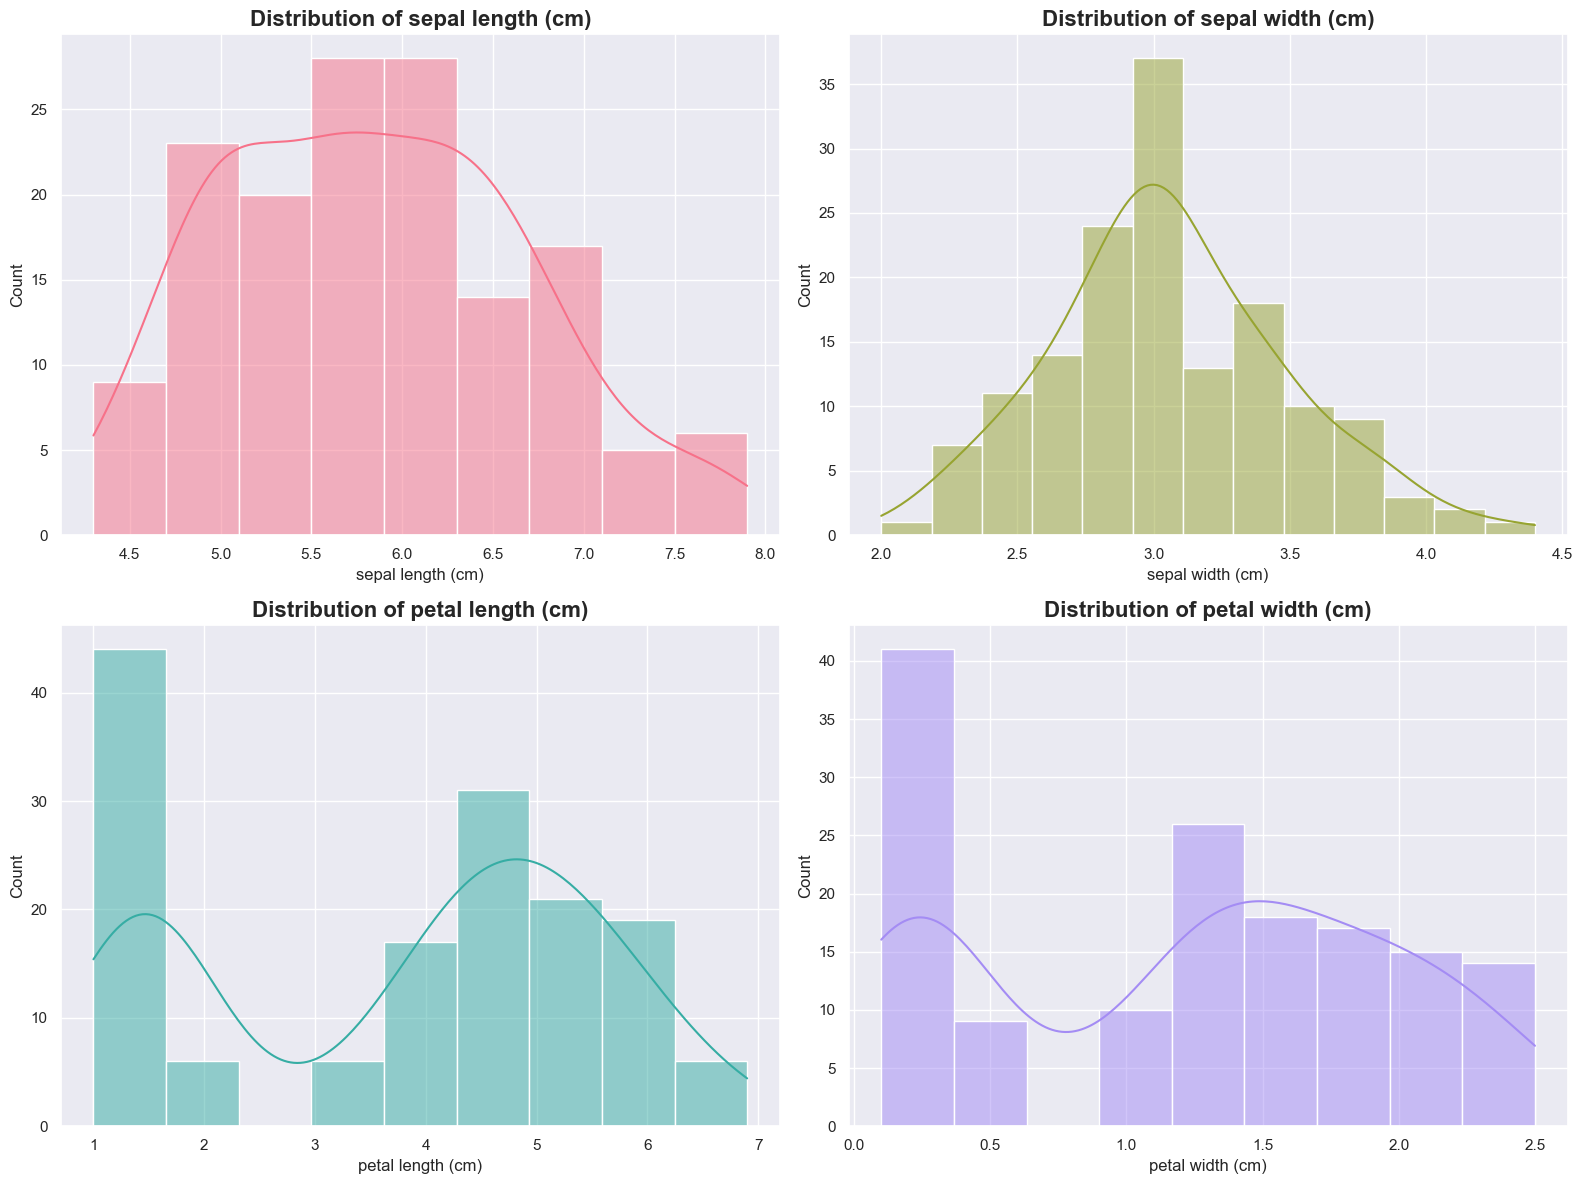

In [20]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,12))
ax = ax.flatten()
colors = sns.color_palette("husl", 4)
for i, iris in enumerate(iris_dataset.feature_names):
    sns.histplot(clear_data[iris], kde=True, color=colors[i], ax=ax[i])
    ax[i].set_title(f"Distribution of {iris}", fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

In [21]:
clear_data['target'] = clear_data['target'].replace([0,1,2],['Setosa', 'Versicolor', 'Virginica'], regex=True)

In [22]:
clear_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Count of Target

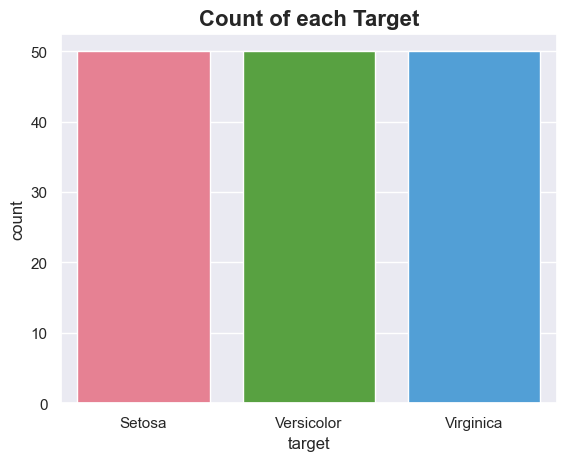

In [23]:
sns.set(style='darkgrid')
sns.countplot(x='target', data=clear_data, palette='husl')
plt.title("Count of each Target", fontsize=16, fontweight='bold')
plt.show()

## Relationship of the data features with the target

* To understand how different measurements interact, we use a pair plot that examines all possible pairs of the four iris features. This works well for our small set of features. Keep in mind, though, that a pair plot doesn't capture all feature interactions simultaneously. Nevertheless, it's a useful tool. In our plot, each data point is color-coded according to the iris species, making it easier to spot distinctions.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


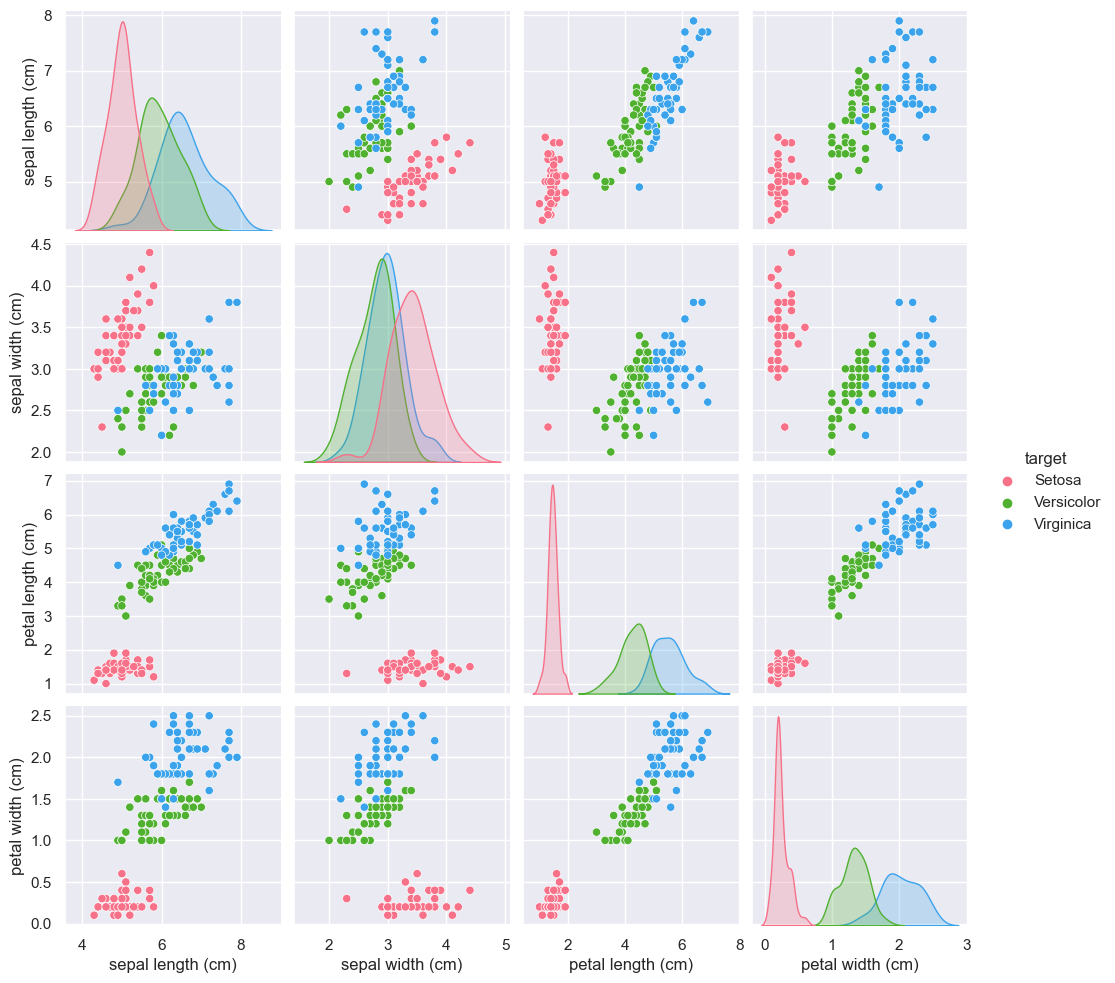

In [24]:
sns.set(style='darkgrid')
sns.pairplot(clear_data, hue='target', palette='husl')
plt.show()

## Training and Testing Data

* To construct a trustworthy machine learning model for iris species prediction, we must evaluate its performance on new, unseen data. Using scikit-learn's `train_test_split` function, we split our dataset into a ***training set (75%) and a test set (25%)***. The training set guides model creation, while the test set assesses its ability to generalize to fresh data. This safeguards against overfitting, where the model merely memorizes the training set. Following the convention, the feature data is represented as X, and labels as y. This approach ensures a fair evaluation of our model's predictive prowess.


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=5)

In [27]:
X_train.shape

(112, 4)

In [28]:
y_train.shape

(112,)

In [29]:
X_test.shape

(38, 4)

In [30]:
y_test.shape

(38,)

## Building k-Nearest Neighbors Model

* Now, let's delve into constructing our machine learning model. Among the various classification algorithms in scikit-learn, we'll opt for a k-nearest neighbors (KNN) classifier for its simplicity. Building the model involves storing the training set, and predictions for new data points are based on the label of the closest point in the training set. The 'k' in KNN allows us to consider multiple neighbors, not just the closest one, and make predictions based on the majority class among these neighbors. In scikit-learn, the `KNeighborsClassifier` class in the neighbors module embodies the KNN algorithm. Crucially, we set the number of neighbors, a key parameter, to 10.


In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=10)

* To construct the model using the training set, we utilize the `fit` method of the knn object. This method takes two arguments: the NumPy array `X_train` containing the training data and the NumPy array `y_train` containing the corresponding training labels.

In [33]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

## Making Predictions

* Now, we can apply our model to make predictions on new, unlabeled data. For instance, let's consider an iris found in the wild with a ***sepal length of 5 cm, sepal width of 2.9 cm, petal length of 1 cm, and petal width of 0.2 cm***. To make predictions, we organize this data into a NumPy array. It's crucial to present these measurements as a row in a two-dimensional NumPy array, as scikit-learn always anticipates two-dimensional arrays for the data.

In [34]:
# Creates a 2D array with shape (1, 4)
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new

array([[5. , 2.9, 1. , 0.2]])

In [35]:
X_new.shape

(1, 4)

In [36]:
prediction = knn.predict(X_new)
print(f"Prediction index: {prediction}")
print(f"Prediction target name: {iris_dataset['target_names'][prediction]}")

Prediction index: [0]
Prediction target name: ['setosa']


* Our model predicts that this new iris belongs to the class 0, meaning its species is Setosa. But how do we know whether we can trust our model? We don’t know the correct species of this sample, which is the whole point of building the model!

## Evaluating the Model

* This is where the test set that we created earlier comes in. This data was not used to build the model, but we do know what the correct species is for each iris in the test set.

In [37]:
knn.score(X_test, y_test)

0.9736842105263158

* Our model achieves a test set accuracy of approximately 97%, indicating accurate predictions for 97% of the irises in the test set. Under certain mathematical assumptions, this implies a high level of confidence in our model, suggesting that it could be reliable for predicting the species of new irises.

# Building RandomForest model

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=2, random_state=5)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=5)

## Making Predictions

In [40]:
X_new2 = np.array([[5, 2.9, 1, 0.2]])
X_new2

array([[5. , 2.9, 1. , 0.2]])

In [41]:
rf_prediction = clf.predict(X_new2)
print(f"Prediction index: {rf_prediction}")
print(f"Prediction target name: {iris_dataset['target_names'][rf_prediction]}")

Prediction index: [0]
Prediction target name: ['setosa']


## Evaluating the Model

In [42]:
clf.score(X_test, y_test)

0.9210526315789473